In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

#### Data Processing

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cat_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [3]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                    shuffle=True,
                                                                    batch_size=BATCH_SIZE,
                                                                    image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


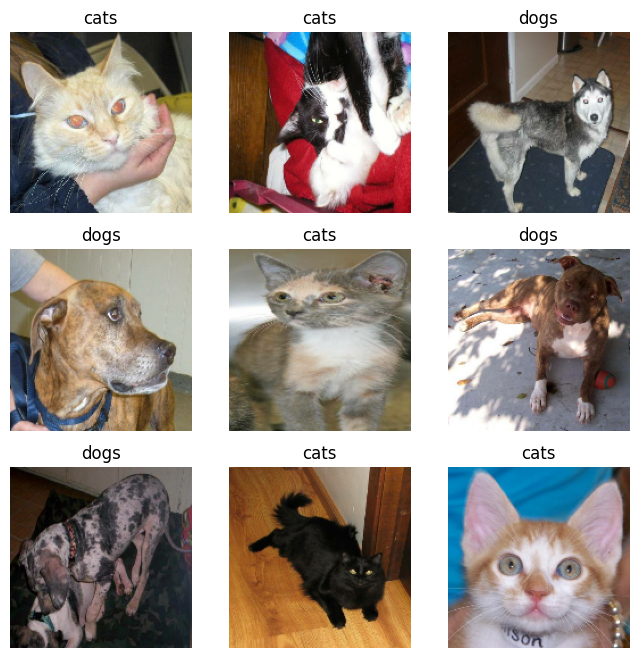

In [4]:
class_names = train_dataset.class_names

image_batch, labels_batch = next(iter(train_dataset))
image_batch = tf.cast(image_batch, tf.uint8)

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i])
    plt.title(class_names[labels_batch[i]])
    plt.axis(False)

In [5]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [6]:
print(f'Number of validation batches: {tf.data.experimental.cardinality(validation_dataset)}')
print(f'Number of test batches: {tf.data.experimental.cardinality(test_dataset)}')

Number of validation batches: 26
Number of test batches: 6


#### Configure the dataset for performance

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

#### Use data augmentation

In [8]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

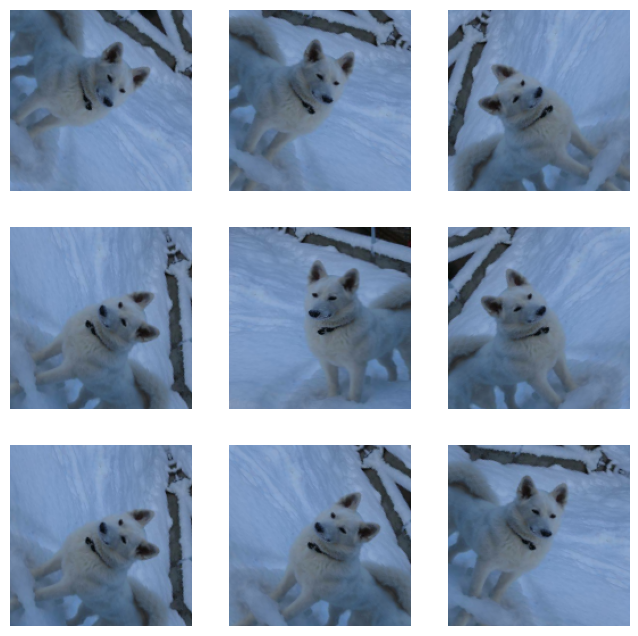

In [9]:
images_batch, _ = next(iter(train_dataset))
image = tf.expand_dims(images_batch[0], 0)

plt.figure(figsize=(8, 8))
for i in range(9):
    augmented_image = tf.cast(data_augmentation(image)[0], tf.uint8)
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image)
    plt.axis(False)

#### Rescale pixel values

In [12]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

Alternatively, you could rescale pixel values from `[0, 255]` to `[-1, 1]` using `tf.keras.layers.Rescaling`.
```python
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)
```

#### Create base model